In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./internationalfootball.csv")

#Taking a look at the dataframe

df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41841,2020-11-18,Kosovo,Moldova,1,0,UEFA Nations League,Pristina,Kosovo,False
41842,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False
41843,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False
41844,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False


In [350]:
# Checking for duplicates, null counts and data types

df.duplicated().values.sum()

0

In [351]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41846 non-null  object
 1   home_team   41846 non-null  object
 2   away_team   41846 non-null  object
 3   home_score  41846 non-null  int64 
 4   away_score  41846 non-null  int64 
 5   tournament  41846 non-null  object
 6   city        41846 non-null  object
 7   country     41846 non-null  object
 8   neutral     41846 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [352]:
# 'date' column in original dataset is of type object. Changing the type of 'date' to datetime for time-series analysis.

df['date'] = pd.to_datetime(df['date'])

In [353]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41846 non-null  datetime64[ns]
 1   home_team   41846 non-null  object        
 2   away_team   41846 non-null  object        
 3   home_score  41846 non-null  int64         
 4   away_score  41846 non-null  int64         
 5   tournament  41846 non-null  object        
 6   city        41846 non-null  object        
 7   country     41846 non-null  object        
 8   neutral     41846 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.6+ MB


In [354]:
# Adding columns that display the result and total score of each game 

df["total_score"] = (df["home_score"] + df["away_score"]).astype(int)

conditions = [(df['home_score'] > df['away_score']),
              (df['home_score'] < df['away_score']),
              (df['home_score'] == df['away_score'])]

results = [df.home_team, df.away_team, "Draw"]

df['result'] = np.select(conditions, results)

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland


In [355]:
'''1. WHICH INTERNATIONAL TEAM HAS WON THE MOST GAMES IN WORLD CUP COMPETITIONS?'''

'1. WHICH INTERNATIONAL TEAM HAS WON THE MOST GAMES IN WORLD CUP COMPETITIONS?'

In [356]:
df_wc = df.loc[df.tournament == "FIFA World Cup"]

df_wc_results = df_wc['result'].value_counts().head(20)
df_wc_results

Draw           199
Brazil          73
Germany         67
Italy           45
Argentina       43
France          34
Spain           30
England         29
Netherlands     27
Uruguay         24
Belgium         20
Sweden          19
Russia          19
Poland          16
Mexico          16
Hungary         15
Portugal        14
Yugoslavia      14
Austria         12
Switzerland     12
Name: result, dtype: int64

In [357]:
'''Brazil leads all international teams in the number of wins in world cup competitions with 73 victories.
 Germany are the second winningest team with 67 victories and Italy are third with 45. Although the most common result is
 a draw, this can be misleading and is a rather meaningless number because it isnt specified per country, but rather a 
 combination of all matches that ended in a draw.'''

df_wc_wins = df_wc_results.drop(['Draw'])


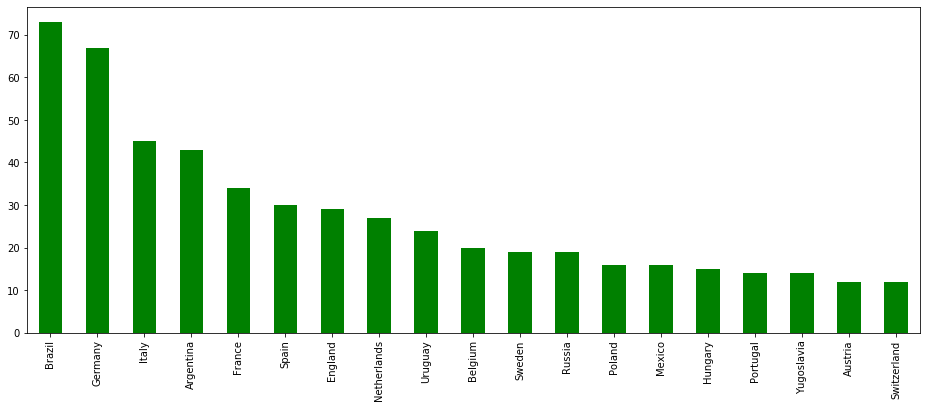

In [358]:
df_wc_wins.plot.bar(figsize = (16,6), color='g')

In [359]:
'''2. WHICH INTERNATIONAL TEAM HAS WON THE MOST GAMES IN EUROS?'''


'2. WHICH INTERNATIONAL TEAM HAS WON THE MOST GAMES IN EUROS?'

In [360]:
df_euros = df.loc[df.tournament == "UEFA Euro"]
df_euros

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score,result
4731,1960-07-06,Czechoslovakia,Russia,0,3,UEFA Euro,Marseille,France,True,3,Russia
4732,1960-07-06,France,Yugoslavia,4,5,UEFA Euro,Paris,France,False,9,Yugoslavia
4734,1960-07-09,France,Czechoslovakia,0,2,UEFA Euro,Marseille,France,False,2,Czechoslovakia
4739,1960-07-10,Russia,Yugoslavia,2,1,UEFA Euro,Paris,France,True,3,Russia
5628,1964-06-17,Denmark,Russia,0,3,UEFA Euro,Barcelona,Spain,True,3,Russia
...,...,...,...,...,...,...,...,...,...,...,...
38147,2016-07-02,Germany,Italy,1,1,UEFA Euro,Bordeaux,France,True,2,Draw
38150,2016-07-03,France,Iceland,5,2,UEFA Euro,Saint-Denis,France,False,7,France
38152,2016-07-06,Portugal,Wales,2,0,UEFA Euro,Lyon,France,True,2,Portugal
38153,2016-07-07,France,Germany,2,0,UEFA Euro,Marseille,France,False,2,France


In [361]:
df_euros_results = df_euros['result'].value_counts().head(20)
df_euros_results

Draw              73
Germany           26
France            20
Spain             19
Portugal          18
Netherlands       17
Italy             16
Russia            12
England           10
Czech Republic    10
Croatia            8
Denmark            7
Belgium            7
Sweden             5
Greece             5
Turkey             4
Wales              4
Czechoslovakia     3
Switzerland        2
Poland             2
Name: result, dtype: int64

In [362]:
df_euros_wins = df_euros_results.drop(['Draw'])
df_euros_wins

Germany           26
France            20
Spain             19
Portugal          18
Netherlands       17
Italy             16
Russia            12
England           10
Czech Republic    10
Croatia            8
Denmark            7
Belgium            7
Sweden             5
Greece             5
Turkey             4
Wales              4
Czechoslovakia     3
Switzerland        2
Poland             2
Name: result, dtype: int64

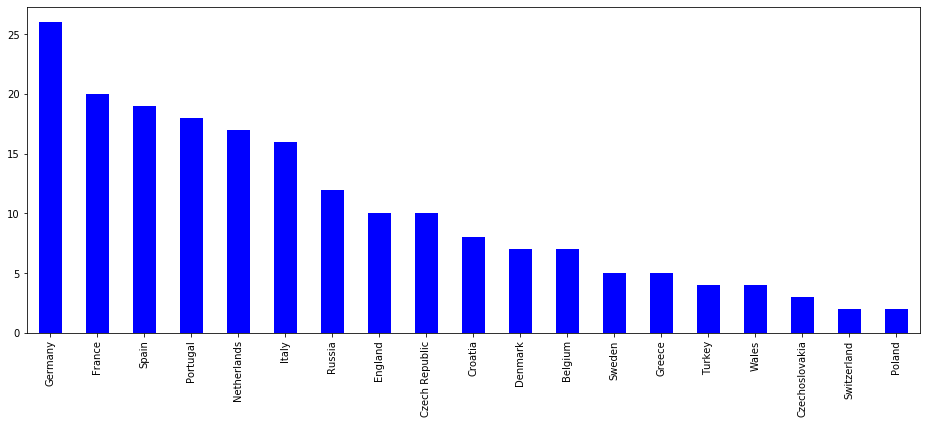

In [363]:
df_euros_wins.plot.bar(figsize = (16,6), color='b')

In [364]:
'''3. AVERAGE GOALS SCORED PER GAME IN EACH WORLD CUP'''

'3. AVERAGE GOALS SCORED PER GAME IN EACH WORLD CUP'

In [365]:
df_wc.set_index('date', inplace = True)
df_wc

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score,result
date,,,,,,,,,,
1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,3,United States
1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,5,France
1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,3,Yugoslavia
1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,4,Romania
1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,Argentina
...,...,...,...,...,...,...,...,...,...,...
2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,4,Draw
2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,1,France
2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,3,Croatia


In [366]:
mean_goals_wc = df_wc['total_score'].resample('4Y').mean()
mean_goals_wc

date
1930-12-31    3.888889
1934-12-31    4.117647
1938-12-31    4.666667
1942-12-31         NaN
1946-12-31         NaN
1950-12-31    4.000000
1954-12-31    5.384615
1958-12-31    3.600000
1962-12-31    2.781250
1966-12-31    2.781250
1970-12-31    2.968750
1974-12-31    2.552632
1978-12-31    2.684211
1982-12-31    2.807692
1986-12-31    2.538462
1990-12-31    2.211538
1994-12-31    2.711538
1998-12-31    2.671875
2002-12-31    2.515625
2006-12-31    2.296875
2010-12-31    2.265625
2014-12-31    2.671875
2018-12-31    2.640625
Freq: 4A-DEC, Name: total_score, dtype: float64

In [367]:
'''The FIFA World Cup competition occurs every four years however it seems during 1942 and 1946, the competition never
took place. Upon research it seems that the hosting country for 1942 was disputed by the South American teams
and the 1946 never took place due to the war the previous year.'''

'The FIFA World Cup competition occurs every four years however it seems during 1942 and 1946, the competition never\ntook place. Upon research it seems that the hosting country for 1942 was disputed by the South American teams\nand the 1946 never took place due to the war the previous year.'

In [368]:
cleaned_mean_goals_wc = mean_goals_wc.dropna()

cleaned_mean_goals_wc

date
1930-12-31    3.888889
1934-12-31    4.117647
1938-12-31    4.666667
1950-12-31    4.000000
1954-12-31    5.384615
1958-12-31    3.600000
1962-12-31    2.781250
1966-12-31    2.781250
1970-12-31    2.968750
1974-12-31    2.552632
1978-12-31    2.684211
1982-12-31    2.807692
1986-12-31    2.538462
1990-12-31    2.211538
1994-12-31    2.711538
1998-12-31    2.671875
2002-12-31    2.515625
2006-12-31    2.296875
2010-12-31    2.265625
2014-12-31    2.671875
2018-12-31    2.640625
Name: total_score, dtype: float64

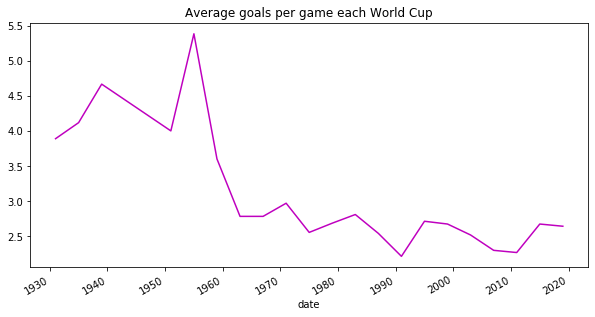

In [369]:
cleaned_mean_goals_wc.plot.line(title = 'Average goals per game each World Cup', color = 'm', figsize=(10,5))

In [370]:
'''4. AVERAGE GOALS SCORED PER GAME IN EACH EUROS'''

'4. AVERAGE GOALS SCORED PER GAME IN EACH EUROS'

In [371]:
df_euros.set_index('date', inplace = True)
df_euros

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score,result
date,,,,,,,,,,
1960-07-06,Czechoslovakia,Russia,0,3,UEFA Euro,Marseille,France,True,3,Russia
1960-07-06,France,Yugoslavia,4,5,UEFA Euro,Paris,France,False,9,Yugoslavia
1960-07-09,France,Czechoslovakia,0,2,UEFA Euro,Marseille,France,False,2,Czechoslovakia
1960-07-10,Russia,Yugoslavia,2,1,UEFA Euro,Paris,France,True,3,Russia
1964-06-17,Denmark,Russia,0,3,UEFA Euro,Barcelona,Spain,True,3,Russia
...,...,...,...,...,...,...,...,...,...,...
2016-07-02,Germany,Italy,1,1,UEFA Euro,Bordeaux,France,True,2,Draw
2016-07-03,France,Iceland,5,2,UEFA Euro,Saint-Denis,France,False,7,France
2016-07-06,Portugal,Wales,2,0,UEFA Euro,Lyon,France,True,2,Portugal


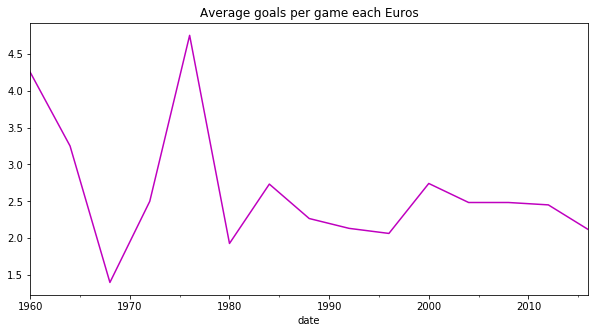

In [372]:
mean_goals_euros = df_euros['total_score'].resample('4Y').mean()
mean_goals_euros.plot.line(title = 'Average goals per game each Euros', color = 'm', figsize=(10,5))

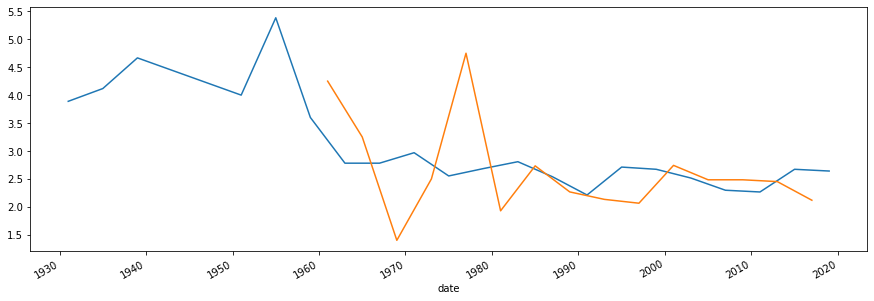

In [373]:
ax = cleaned_mean_goals_wc.plot()
mean_goals_euros.plot(ax=ax, figsize = (15,5))


In [374]:
''' WHICH COUNTRIES WIN THE MOST AT HOME AND WHICH COUNTRIES WIN THE MOST BEING THE AWAY TEAM'''

' WHICH COUNTRIES WIN THE MOST AT HOME AND WHICH COUNTRIES WIN THE MOST BEING THE AWAY TEAM'

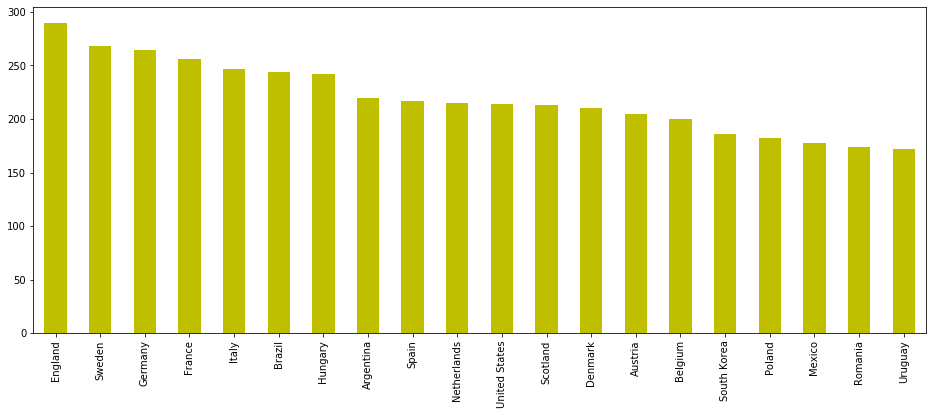

In [375]:
# We have to account for neutral venues in which case the home team isn't necessarily the home team

home_win = df.loc[(df.home_team == df.result) & (df.home_team == df.country) & (df.neutral == False)]

home_win['result'].value_counts().head(20)

home_win.set_index('date', inplace = True)

home_win['result'].value_counts().head(20).plot.bar(figsize = (16,6), color='y')

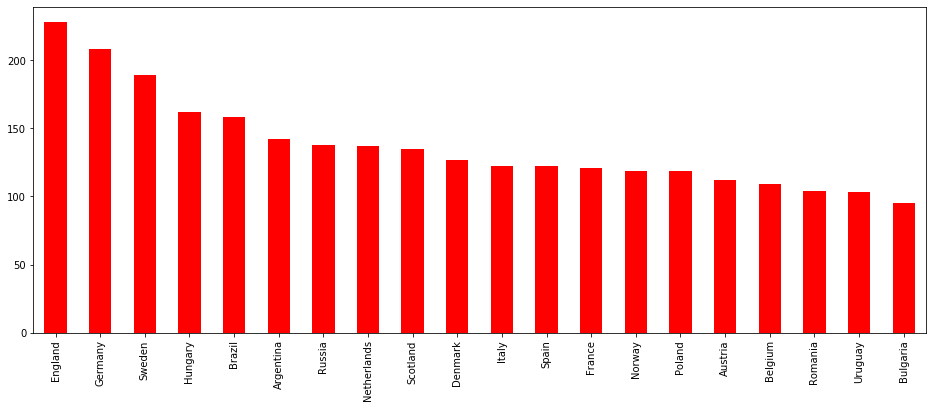

In [376]:
away_win = df.loc[(df.away_team == df.result) & (df.home_team == df.country) & (df.neutral == False)]

away_win['result'].value_counts().head(20)

away_win.set_index('date', inplace = True)

away_win['result'].value_counts().head(20).plot.bar(figsize = (16,6), color='r')

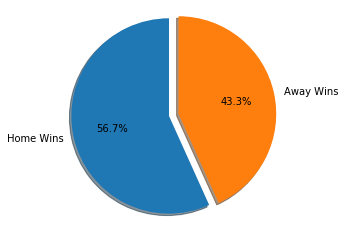

In [377]:
# Percentage comparison of victories of home teams and away teams

df_total_home_wins = df.loc[(df.home_team == df.result) & (df.home_team == df.country)]

totH = len(df_total_home_wins['result'])

df_total_away_wins = df.loc[(df.away_team == df.result) & (df.away_team != df.country)]

totA = len(df_total_away_wins['result'])

tot = totH + totA

H = totH / tot
A = totA / tot


labels = ['Home Wins', 'Away Wins']
sizes = [H, A]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,)
ax1.axis('equal')

plt.show()